# **1. Configuración del Ambiente**


---

In [3]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **2. EDA**


---

In [4]:
df_colombia_bogota = pd.read_csv('../data/colombia_bogota_limpio.csv', sep=';')
df_colombia_bogota.head()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,Valor,Valor_USD
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,3.600000e+08,93240.09
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,6.700000e+08,173530.17
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,1.120000e+09,290080.29
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,8.900000e+08,230510.23
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,9.700000e+08,251230.25


In [5]:
df_colombia_bogota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5918 entries, 0 to 5917
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tipo          5918 non-null   object 
 1   Descripcion   5918 non-null   object 
 2   Habitaciones  5918 non-null   int64  
 3   Baños         5918 non-null   int64  
 4   Área          5918 non-null   int64  
 5   Barrio        5918 non-null   object 
 6   Valor         5918 non-null   float64
 7   Valor_USD     5918 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 370.0+ KB


In [6]:
# Asumiendo que df_colombia_bogota ya está cargado
# Resumen estadístico
desc_numerico = df_colombia_bogota.describe()
desc_categorico = df_colombia_bogota.describe(include=['object'])

print("Resumen Estadístico de Variables Numéricas:")
print(desc_numerico)

print("\nResumen Estadístico de Variables Categóricas:")
print(desc_categorico)

Resumen Estadístico de Variables Numéricas:
       Habitaciones        Baños           Área         Valor     Valor_USD
count   5918.000000  5918.000000    5918.000000  5.918000e+03  5.918000e+03
mean       3.161372     2.545624     166.018080  6.550196e+08  1.696502e+05
std        2.316691     1.294754    2180.835312  7.668709e+08  1.986198e+05
min        1.000000     0.000000       2.000000  6.000000e+07  1.554002e+04
25%        2.000000     2.000000      60.000000  2.741500e+08  7.100492e+04
50%        3.000000     2.000000      87.000000  4.485000e+08  1.161616e+05
75%        3.000000     3.000000     152.000000  7.500000e+08  1.942502e+05
max      110.000000     9.000000  166243.000000  1.600000e+10  4.144004e+06

Resumen Estadístico de Variables Categóricas:
               Tipo                      Descripcion   Barrio
count          5918                             5918     5918
unique            8                              314      148
top     Apartamento  Apartamento en ven

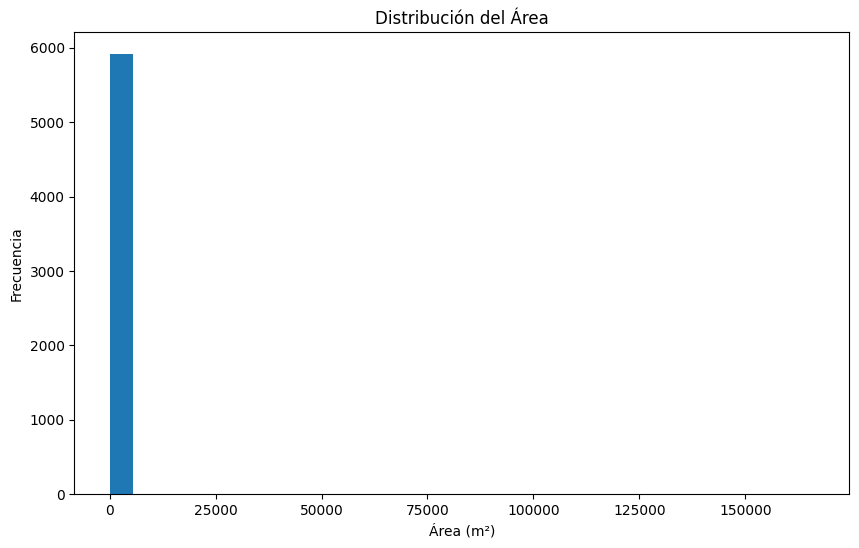

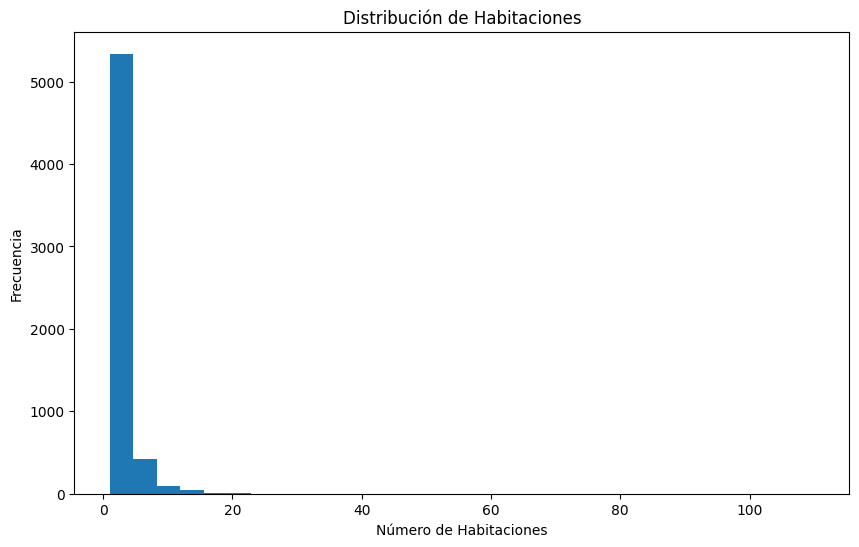

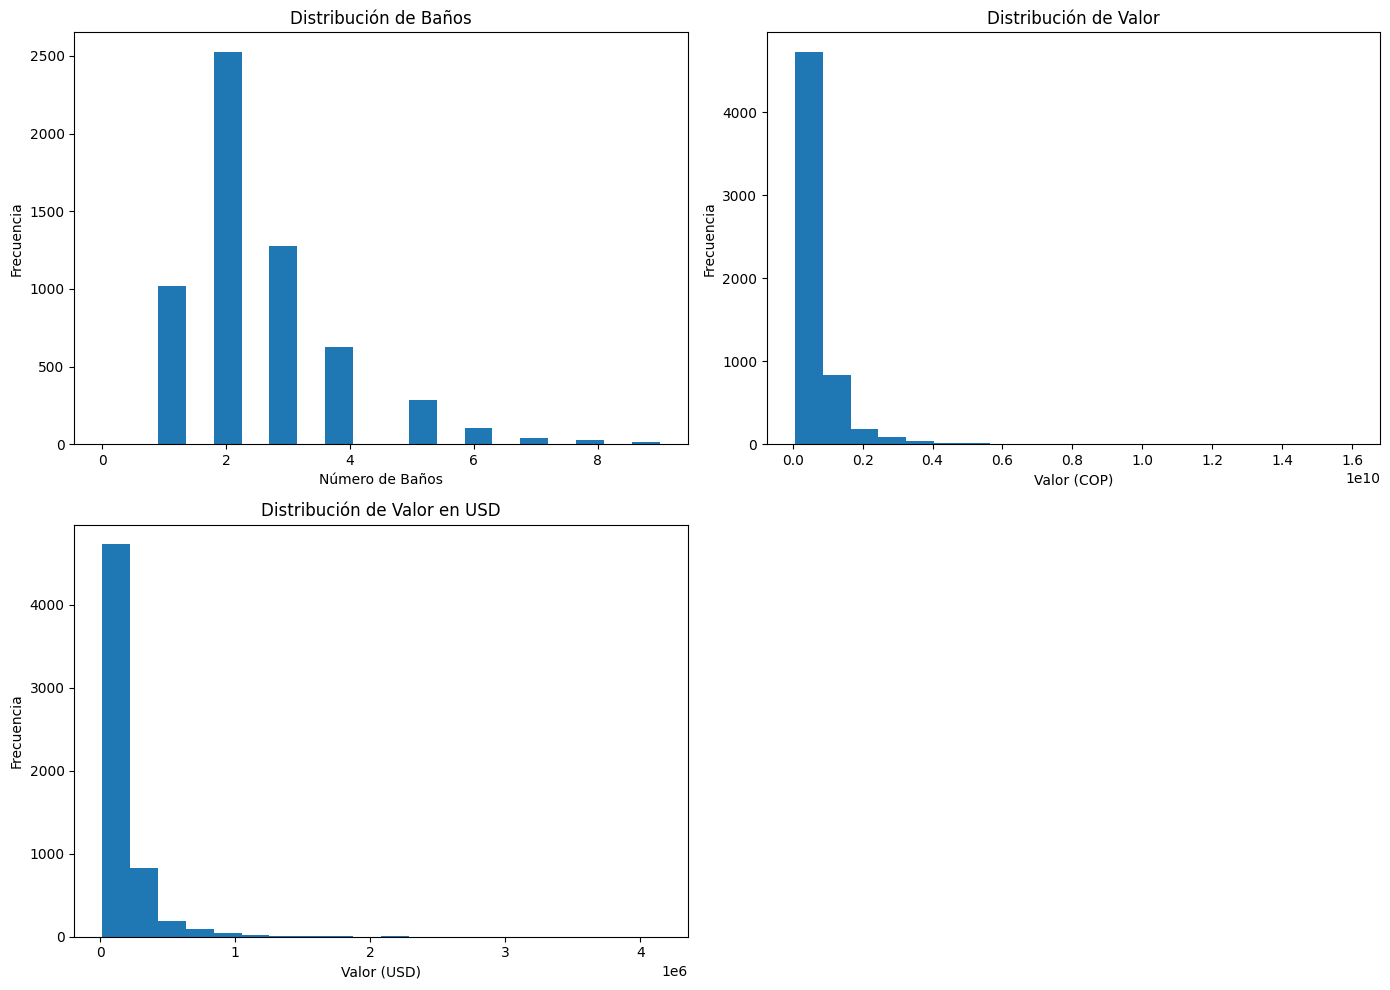

In [7]:
# Histograma de Área
plt.figure(figsize=(10, 6))
df_colombia_bogota['Área'].hist(bins=30)
plt.title('Distribución del Área')
plt.xlabel('Área (m²)')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.show()

# Histograma de Habitaciones
plt.figure(figsize=(10, 6))
df_colombia_bogota['Habitaciones'].hist(bins=30)
plt.title('Distribución de Habitaciones')
plt.xlabel('Número de Habitaciones')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.show()

# Histogramas de las demás variables numéricas en un solo gráfico
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Histograma de Baños
axs[0, 0].hist(df_colombia_bogota['Baños'], bins=20)
axs[0, 0].set_title('Distribución de Baños')
axs[0, 0].set_xlabel('Número de Baños')
axs[0, 0].set_ylabel('Frecuencia')

# Histograma de Valor
axs[0, 1].hist(df_colombia_bogota['Valor'], bins=20)
axs[0, 1].set_title('Distribución de Valor')
axs[0, 1].set_xlabel('Valor (COP)')
axs[0, 1].set_ylabel('Frecuencia')

# Histograma de Valor_USD
axs[1, 0].hist(df_colombia_bogota['Valor_USD'], bins=20)
axs[1, 0].set_title('Distribución de Valor en USD')
axs[1, 0].set_xlabel('Valor (USD)')
axs[1, 0].set_ylabel('Frecuencia')

# Ocultar el cuarto subplot vacío
fig.delaxes(axs[1, 1])

plt.tight_layout()
plt.show()

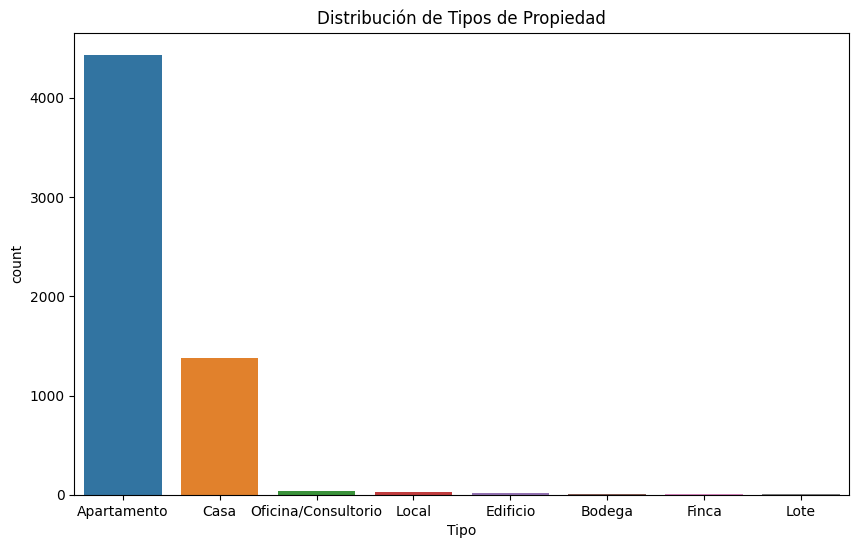

In [8]:
# Distribución de 'Tipo'
plt.figure(figsize=(10, 6))
sns.countplot(data=df_colombia_bogota, x='Tipo', order=df_colombia_bogota['Tipo'].value_counts().index)
plt.title('Distribución de Tipos de Propiedad')
plt.show()



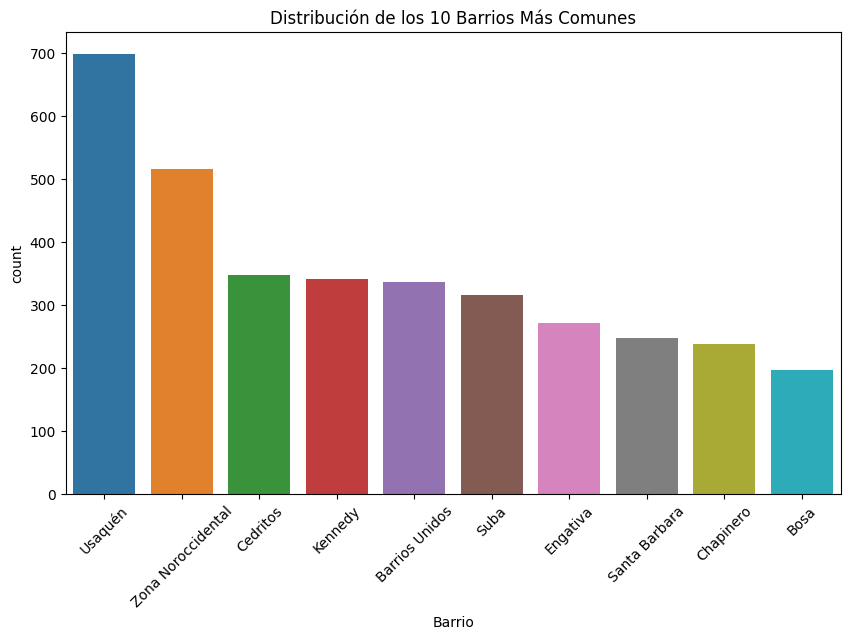

In [9]:
top_barrios = df_colombia_bogota['Barrio'].value_counts().nlargest(10).index

# Filtrar el DataFrame para incluir solo los 10 barrios más comunes
df_top_barrios = df_colombia_bogota[df_colombia_bogota['Barrio'].isin(top_barrios)]

# Gráfica de barras verticales de los 10 barrios más comunes
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_barrios, x='Barrio', order=top_barrios)
plt.title('Distribución de los 10 Barrios Más Comunes')
plt.xticks(rotation=45)
plt.show()

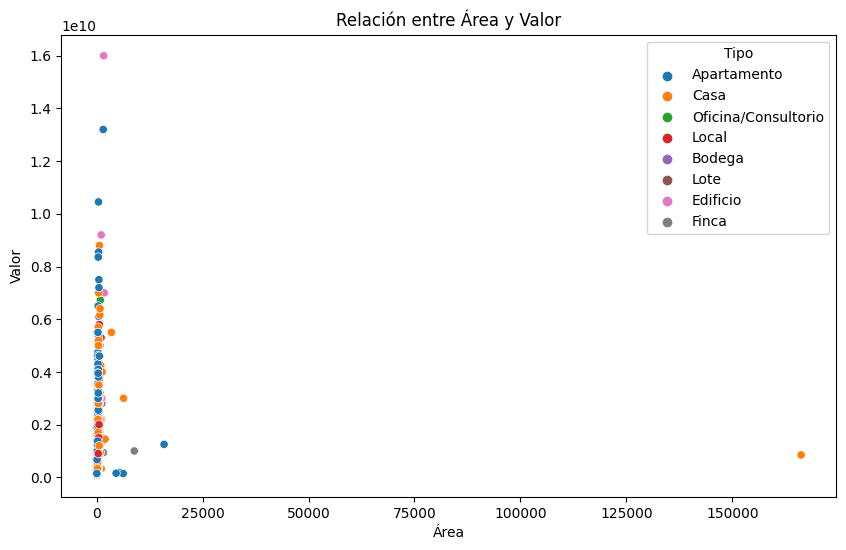

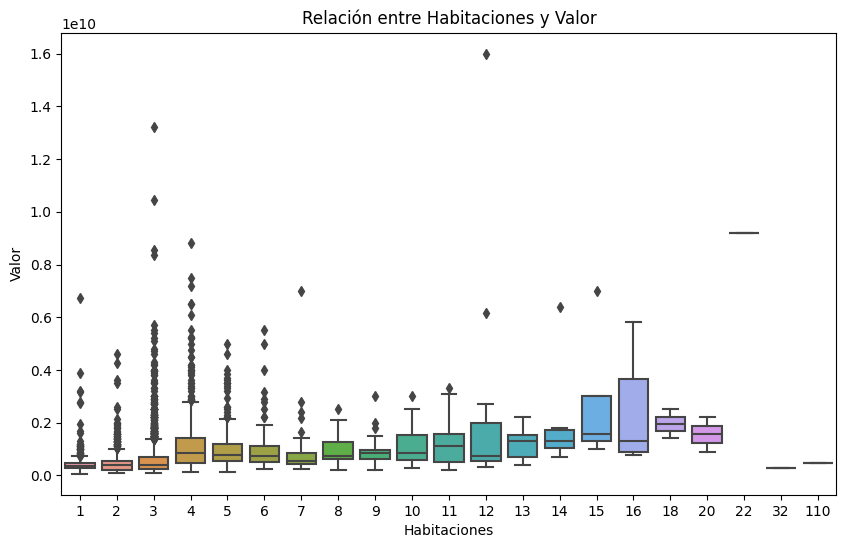

In [10]:
# Relación entre 'Área' y 'Valor'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_colombia_bogota, x='Área', y='Valor', hue='Tipo')
plt.title('Relación entre Área y Valor')
plt.show()

# Relación entre 'Habitaciones' y 'Valor'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_colombia_bogota, x='Habitaciones', y='Valor')
plt.title('Relación entre Habitaciones y Valor')
plt.show()


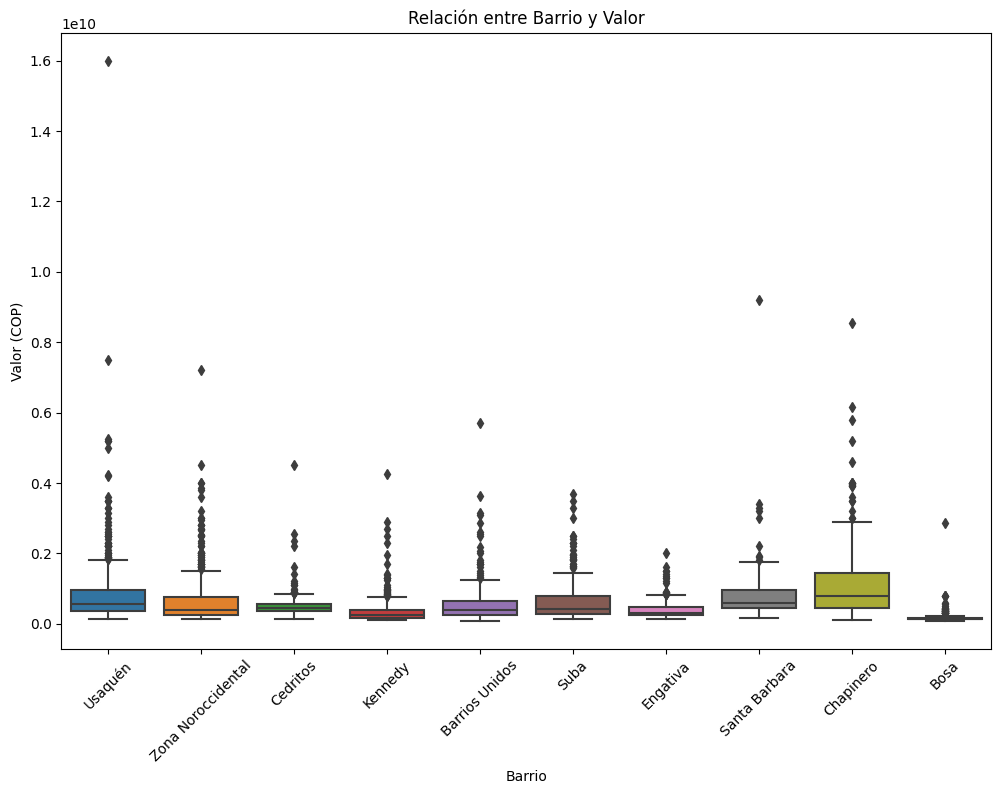

In [11]:
# Filtrar el DataFrame para incluir solo los 10 barrios con más datos
df_top_barrios = df_colombia_bogota[df_colombia_bogota['Barrio'].isin(top_barrios)]

# Gráfico de caja para la relación entre Barrio y Valor
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_top_barrios, x='Barrio', y='Valor', order=top_barrios)
plt.title('Relación entre Barrio y Valor')
plt.xlabel('Barrio')
plt.ylabel('Valor (COP)')
plt.xticks(rotation=45)
plt.show()